<a href="https://colab.research.google.com/github/Olena-24/Science-HW/blob/main/HW_9_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!pip install keras-tuner

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 2.5 MB/s eta 0:00:00


In [18]:
import keras_tuner as kt

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import Sequential, layers
from tensorflow.keras.layers import Dense, Dropout, Flatten, BatchNormalization
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
import keras_tuner as kt
import time

In [6]:
# Завантаження датасету
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 1s 0us/step


In [7]:
# Нормалізація даних
X_train = X_train / 255.0
X_test = X_test / 255.0

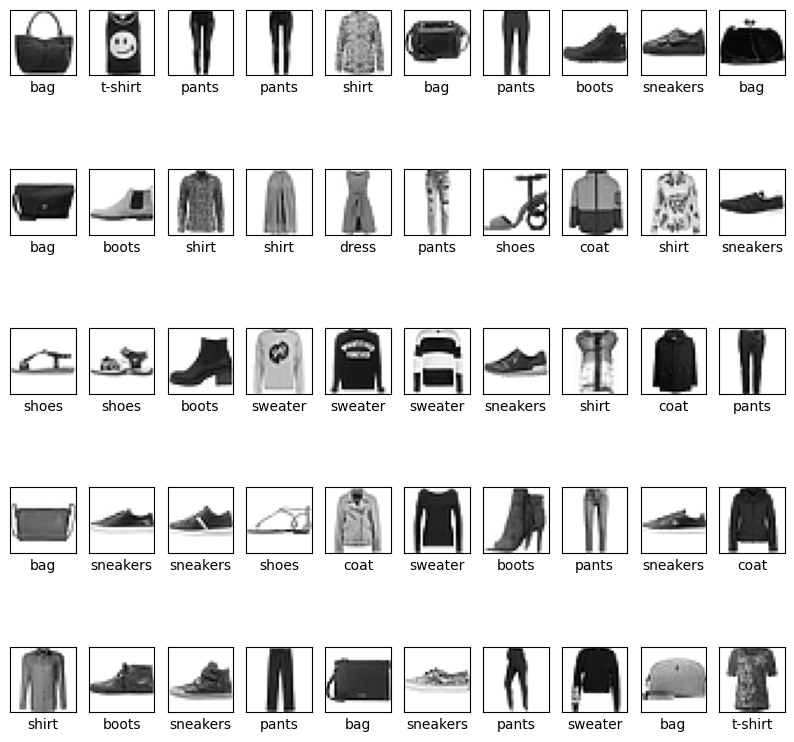

In [8]:
# Візуалізація даних
classes = [
    "t-shirt", "pants", "sweater", "dress", "coat",
    "shoes", "shirt", "sneakers", "bag", "boots"
]

plt.figure(figsize=(10, 10))
for i in range(100, 150):
    plt.subplot(5, 10, i - 100 + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i], cmap=plt.cm.binary)
    plt.xlabel(classes[y_train[i]])
plt.show()

In [9]:
# Параметри
epochs = 50
batch_size = 64
learning_rate = 1e-3

In [10]:
# Побудова моделі
def create_model():
    model = Sequential([
        Flatten(input_shape=(28, 28)),
        Dense(512, activation="relu"),
        BatchNormalization(),
        Dropout(0.4),
        Dense(256, activation="relu"),
        BatchNormalization(),
        Dropout(0.4),
        Dense(128, activation="relu"),
        BatchNormalization(),
        Dropout(0.4),
        Dense(10, activation="softmax")
    ])

    model.compile(
        optimizer=Adam(learning_rate=learning_rate),
        loss="sparse_categorical_crossentropy",
        metrics=["accuracy"]
    )

    return model

model = create_model()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 512)               401920    
                                                                 
 batch_normalization (Batch  (None, 512)               2048      
 Normalization)                                                  
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 batch_normalization_1 (Bat  (None, 256)               1024      
 chNormalization)                                       

In [11]:
# Колбеки
early_stopping = EarlyStopping(monitor="val_loss", patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor="val_loss", factor=0.2, patience=3, min_lr=1e-6)

In [12]:
# Вимірювання часу навчання моделі
start_time = time.time()
history = model.fit(
    X_train, y_train, epochs=epochs, batch_size=batch_size,
    validation_data=(X_test, y_test), callbacks=[early_stopping, reduce_lr]
)
end_time = time.time()
training_time = end_time - start_time

# Оцінка моделі
test_loss, test_accuracy = model.evaluate(X_test, y_test)

# Виведення результатів
print(f"Model training time: {training_time:.2f} seconds")
print(f"Test accuracy: {test_accuracy}")
print(f"Test loss: {test_loss}")


Epoch 1/50
938/938 [==============================] - 16s 15ms/step - loss: 0.6423 - accuracy: 0.7757 - val_loss: 0.4544 - val_accuracy: 0.8418 - lr: 0.0010
Epoch 2/50
938/938 [==============================] - 15s 16ms/step - loss: 0.4865 - accuracy: 0.8278 - val_loss: 0.4320 - val_accuracy: 0.8430 - lr: 0.0010
Epoch 3/50
938/938 [==============================] - 14s 15ms/step - loss: 0.4505 - accuracy: 0.8387 - val_loss: 0.4043 - val_accuracy: 0.8526 - lr: 0.0010
Epoch 4/50
938/938 [==============================] - 14s 15ms/step - loss: 0.4339 - accuracy: 0.8446 - val_loss: 0.4063 - val_accuracy: 0.8486 - lr: 0.0010
Epoch 5/50
938/938 [==============================] - 14s 15ms/step - loss: 0.4146 - accuracy: 0.8496 - val_loss: 0.3905 - val_accuracy: 0.8545 - lr: 0.0010
Epoch 6/50
938/938 [==============================] - 14s 15ms/step - loss: 0.4073 - accuracy: 0.8545 - val_loss: 0.3813 - val_accuracy: 0.8612 - lr: 0.0010
Epoch 7/50
938/938 [==============================] - 14s 

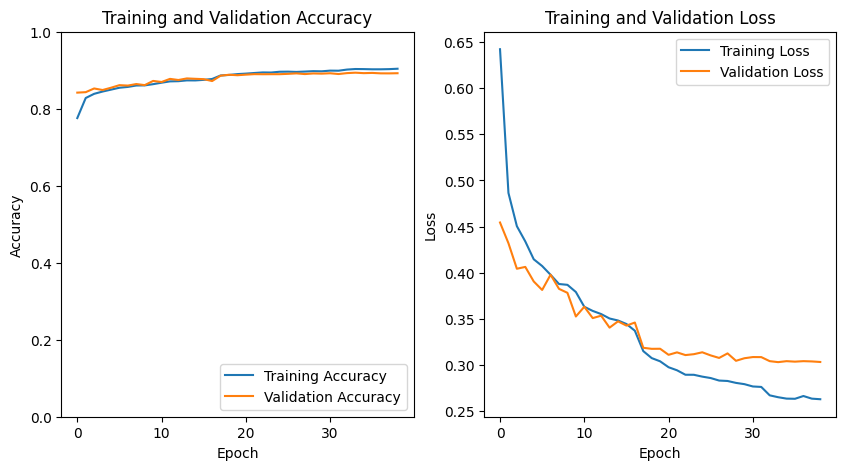

In [13]:
# Графік точності навчання та валідації
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.title('Training and Validation Accuracy')
plt.legend(loc='lower right')

# Графік втрат навчання та валідації
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend(loc='upper right')

plt.show()

1/1 [==============================] - 0s 23ms/step


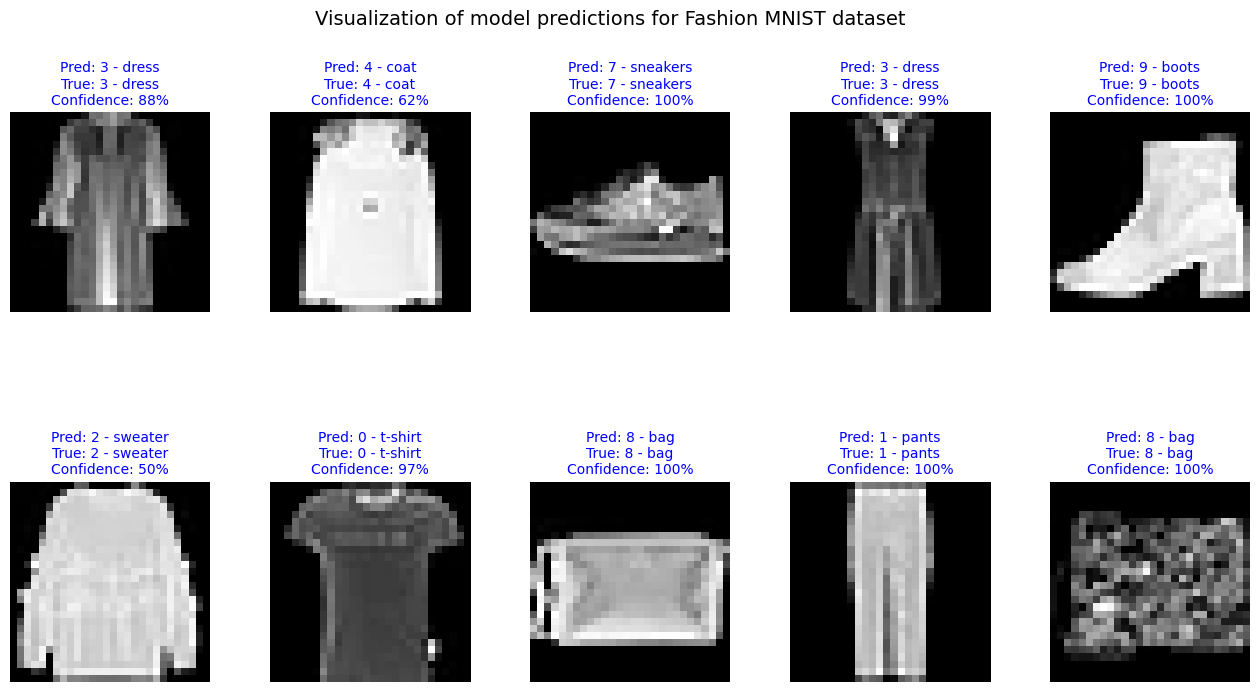

In [19]:
# Візуалізація передбачень моделі
number_of_images = 10
f, ax = plt.subplots(2, 5, figsize=(16, 8))
f.subplots_adjust(hspace=0.5, wspace=0.3)
f.suptitle("Visualization of model predictions for Fashion MNIST dataset", fontsize=14)

random_indices = np.random.choice(len(X_test), size=number_of_images, replace=False)

for i, idx in enumerate(random_indices):
    img, true_label = X_test[idx], y_test[idx]
    predictions = model.predict(np.expand_dims(img, axis=0))
    predicted_label = np.argmax(predictions)
    confidence = np.max(predictions) * 100

    color = "blue" if predicted_label == true_label else "red"
    ax[i // 5, i % 5].imshow(img.reshape(28, 28), cmap="gray")
    ax[i // 5, i % 5].axis("off")
    ax[i // 5, i % 5].set_title(
        f"Pred: {predicted_label} - {classes[predicted_label]}\nTrue: {true_label} - {classes[true_label]}\nConfidence: {confidence:.0f}%",
        fontsize=10,
        color=color,
    )

plt.show()

# Model using Kerastuner


In [20]:
# Визначення функції для створення моделі з налаштовуваними гіперпараметрами
def build_model(hp):
    model = keras.Sequential()
    model.add(layers.Flatten(input_shape=(28, 28)))

    model.add(
        layers.Dense(
            units=hp.Int("units", min_value=32, max_value=512, step=32),
            activation=hp.Choice(
                "activation", ["relu", "tanh", "sigmoid", "elu", "selu", "softplus"]
            ),
        )
    )

    model.add(layers.Dense(10, activation="softmax"))

    optimizer_choice = hp.Choice(
        "optimizer", ["adam", "sgd", "rmsprop", "nadam", "adagrad"]
    )
    learning_rate = hp.Float("lr", min_value=1e-4, max_value=1e-2, sampling="log")

    if optimizer_choice == "adam":
        optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    elif optimizer_choice == "sgd":
        optimizer = keras.optimizers.SGD(learning_rate=learning_rate)
    elif optimizer_choice == "rmsprop":
        optimizer = keras.optimizers.RMSprop(learning_rate=learning_rate)
    elif optimizer_choice == "nadam":
        optimizer = keras.optimizers.Nadam(learning_rate=learning_rate)
    elif optimizer_choice == "adagrad":
        optimizer = keras.optimizers.Adagrad(learning_rate=learning_rate)

    model.compile(
        optimizer=optimizer,
        loss="sparse_categorical_crossentropy",
        metrics=["accuracy"],
    )

    return model

In [23]:
# Налаштування Random Search для налаштування гіперпараметрів
tuner = kt.RandomSearch(
    build_model,
    objective="val_accuracy",
    max_trials=9,
    executions_per_trial=2,
    directory="my_dir",
    project_name="fashion_mnist_tuning"
)

In [24]:
# Встановлення колбеків
early_stopping = EarlyStopping(monitor="val_loss", patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor="val_loss", factor=0.2, patience=3, min_lr=1e-6)

In [25]:
# Запуск налаштування гіперпараметрів
start_time = time.time()
tuner.search(X_train, y_train, epochs=20, validation_split=0.2, callbacks=[early_stopping, reduce_lr])
end_time = time.time()
search_time = end_time - start_time
print(f"Hyperparameter search time: {search_time:.2f} seconds")


Trial 9 Complete [00h 06m 46s]
val_accuracy: 0.8989166617393494

Best val_accuracy So Far: 0.9002083241939545
Total elapsed time: 00h 51m 14s
Hyperparameter search time: 3074.15 seconds


In [39]:
tuner.search_space_summary()

Search space summary
Default search space size: 4
units (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 512, 'step': 32, 'sampling': 'linear'}
activation (Choice)
{'default': 'relu', 'conditions': [], 'values': ['relu', 'tanh', 'sigmoid', 'elu', 'selu', 'softplus'], 'ordered': False}
optimizer (Choice)
{'default': 'adam', 'conditions': [], 'values': ['adam', 'sgd', 'rmsprop', 'nadam', 'adagrad'], 'ordered': False}
lr (Float)
{'default': 0.0001, 'conditions': [], 'min_value': 0.0001, 'max_value': 0.01, 'step': None, 'sampling': 'log'}


In [26]:
# Отримання найкращої моделі
best_model = tuner.get_best_models(num_models=1)[0]
best_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 288)               226080    
                                                                 
 dense_1 (Dense)             (None, 10)                2890      
                                                                 
Total params: 228970 (894.41 KB)
Trainable params: 228970 (894.41 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [27]:
# Тренування моделі з найкращими гіперпараметрами
start_time = time.time()
history = best_model.fit(X_train, y_train, epochs=20, validation_split=0.2, callbacks=[early_stopping, reduce_lr])
end_time = time.time()
training_time = end_time - start_time
print(f"Model training time: {training_time:.2f} seconds")


Epoch 1/20
1500/1500 [==============================] - 9s 6ms/step - loss: 0.1444 - accuracy: 0.9481 - val_loss: 0.3308 - val_accuracy: 0.9002 - lr: 3.0082e-05
Epoch 2/20
1500/1500 [==============================] - 9s 6ms/step - loss: 0.1439 - accuracy: 0.9476 - val_loss: 0.3309 - val_accuracy: 0.9002 - lr: 3.0082e-05
Epoch 3/20
1500/1500 [==============================] - 10s 7ms/step - loss: 0.1438 - accuracy: 0.9483 - val_loss: 0.3301 - val_accuracy: 0.8997 - lr: 3.0082e-05
Epoch 4/20
1500/1500 [==============================] - 8s 6ms/step - loss: 0.1433 - accuracy: 0.9482 - val_loss: 0.3301 - val_accuracy: 0.9003 - lr: 3.0082e-05
Epoch 5/20
1500/1500 [==============================] - 9s 6ms/step - loss: 0.1431 - accuracy: 0.9484 - val_loss: 0.3304 - val_accuracy: 0.9006 - lr: 3.0082e-05
Epoch 6/20
1500/1500 [==============================] - 10s 7ms/step - loss: 0.1427 - accuracy: 0.9488 - val_loss: 0.3314 - val_accuracy: 0.9000 - lr: 3.0082e-05
Epoch 7/20
1500/1500 [==========

In [28]:
# Оцінка моделі
test_loss, test_accuracy = best_model.evaluate(X_test, y_test)
print(f"Test accuracy: {test_accuracy}")
print(f"Test loss: {test_loss}")

313/313 [==============================] - 1s 2ms/step - loss: 0.3585 - accuracy: 0.8934
Test accuracy: 0.8934000134468079
Test loss: 0.35845643281936646


In [29]:
# Оцінка якості навчання
b_scores = best_model.evaluate(X_test, y_test, verbose=1)
print("Correct answers, in percentage for MODEL with TUNER:", round(b_scores[1] * 100, 2))


313/313 [==============================] - 1s 2ms/step - loss: 0.3585 - accuracy: 0.8934
Correct answers, in percentage for MODEL with TUNER: 89.34


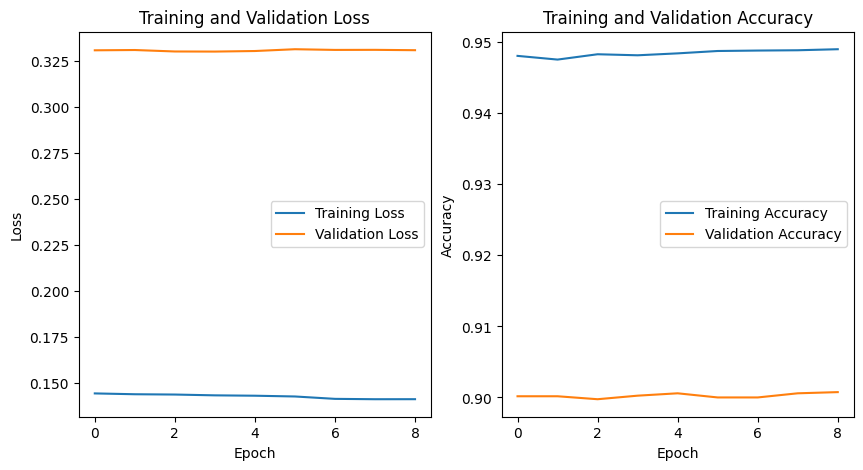

In [32]:
# Виведення кривих навчання
plt.figure(figsize=(10, 5))

# Втрати на тренувальному та валідаційному наборах
plt.subplot(1, 2, 1)
plt.plot(history.history["loss"], label="Training Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training and Validation Loss")
plt.legend()

# Точність на тренувальному та валідаційному наборах
plt.subplot(1, 2, 2)
plt.plot(history.history["accuracy"], label="Training Accuracy")
plt.plot(history.history["val_accuracy"], label="Validation Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Training and Validation Accuracy")
plt.legend()

plt.show()

1/1 [==============================] - 0s 21ms/step


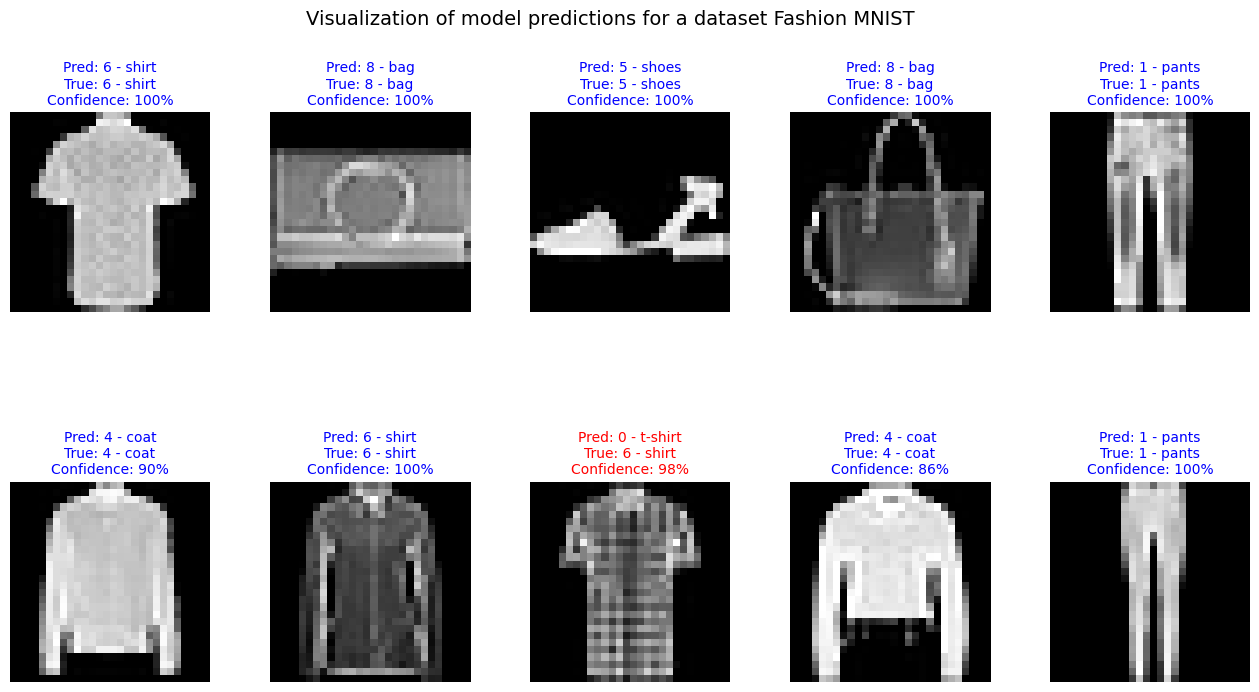

In [36]:
# Визначення кількості випадкових зображень для відображення
number_of_images = 10

# Створення сітки для відображення зображень
f, ax = plt.subplots(2, 5, figsize=(16, 8))
f.subplots_adjust(hspace=0.5, wspace=0.3)
f.suptitle("Visualization of model predictions for a dataset Fashion MNIST", fontsize=14)

# Вибір випадкових індексів для зображень
random_indices = np.random.choice(len(X_test), size=number_of_images, replace=False)

# Цикл для відображення зображень та їх передбачень
for i, idx in enumerate(random_indices):
    # Отримання зображення та його справжньої мітки
    img, true_label = X_test[idx], y_test[idx]

    # Розпізнання зображення
    predictions = best_model.predict(np.expand_dims(img, axis=0))
    predicted_label = np.argmax(predictions)
    confidence = np.max(predictions) * 100

    # Встановлення кольору для заголовка в залежності від правильності передбачення
    color = "blue" if predicted_label == true_label else "red"

    # Вивід зображення
    ax[i // 5, i % 5].imshow(img, cmap="gray")
    ax[i // 5, i % 5].axis("off")
    ax[i // 5, i % 5].set_title(
        f"Pred: {predicted_label} - {classes[predicted_label]}\nTrue: {true_label} - {classes[true_label]}\nConfidence: {confidence:.0f}%",
        fontsize=10,
        color=color,
    )

plt.show()


1/1 [==============================] - 0s 21ms/step


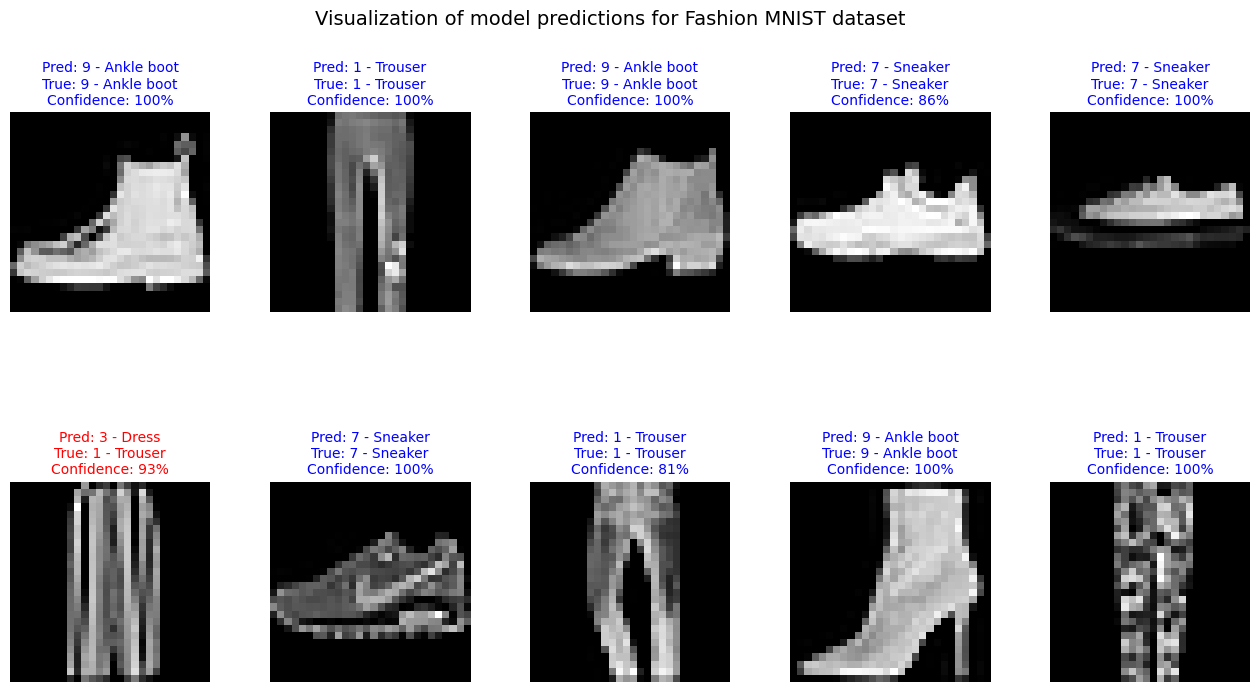

In [37]:
# Візуалізація передбачень моделі
classes = [
    "T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
    "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"
]

number_of_images = 10
f, ax = plt.subplots(2, 5, figsize=(16, 8))
f.subplots_adjust(hspace=0.5, wspace=0.3)
f.suptitle("Visualization of model predictions for Fashion MNIST dataset", fontsize=14)

random_indices = np.random.choice(len(X_test), size=number_of_images, replace=False)

for i, idx in enumerate(random_indices):
    img, true_label = X_test[idx], y_test[idx]
    predictions = best_model.predict(np.expand_dims(img, axis=0))
    predicted_label = np.argmax(predictions)
    confidence = np.max(predictions) * 100

    color = "blue" if predicted_label == true_label else "red"
    ax[i // 5, i % 5].imshow(img, cmap="gray")
    ax[i // 5, i % 5].axis("off")
    ax[i // 5, i % 5].set_title(
        f"Pred: {predicted_label} - {classes[predicted_label]}\nTrue: {true_label} - {classes[true_label]}\nConfidence: {confidence:.0f}%",
        fontsize=10,
        color=color,
    )

plt.show()